In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# SCREENTIME CSV FILES
PlayCountTikTok = "/Users/isabelle/Desktop/TikTok Share Count and Play Count/Resources/PlayCountTikTok.csv"

In [2]:
tiktokdata = pd.read_csv(PlayCountTikTok)
tiktokdata.head()

,authorMeta/avatar,authorMeta/digg,authorMeta/fans,authorMeta/following,authorMeta/heart,authorMeta/id,authorMeta/name,authorMeta/nickName,authorMeta/signature,authorMeta/verified,...,musicMeta/playUrl,playCount,searchHashtag/name,searchHashtag/views,shareCount,text,videoMeta/duration,videoMeta/height,videoMeta/width,webVideoUrl
0,https://p16-sign-sg.tiktokcdn.com/aweme/720x72...,420,13200000,28,150400000,6.713130e+18,miso_ara,미소아라 Miso_Ara,soonent@soon-ent.co.kr\n.\n Miso Ara IG,True,...,https://sf16-ies-music-sg.tiktokcdn.com/obj/ti...,200600000,meme,556B,377700,Ara Woah #woah #woahchallenge #foryou #fyp...,17,1280,720,https://www.tiktok.com/@miso_ara/video/6797294...
1,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,10800,1300000,182,35100000,6.929580e+18,crinka11,Chris Rinker,insta: chrisrinker73,False,...,https://sf16-ies-music-va.tiktokcdn.com/obj/mu...,79600000,meme,556B,205400,#fyp #meme #funny #meme #vine,11,1024,576,https://www.tiktok.com/@crinka11/video/6958603...
2,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,251,696800,42,15900000,7.083450e+18,iampets_com,IamPéts,"Pet supplies, toys online store. All products ...",False,...,https://sf16-ies-music-va.tiktokcdn.com/obj/ie...,106100000,meme,556B,323000,The end #funny #funnyvideos #animals #haha #me...,25,1024,576,https://www.tiktok.com/@iampets_com/video/7083...
3,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,218,510200,56,32100000,7.087290e+18,dailydosevideos_,dailydosevideos,Daily dose of videos/memes \nsupport the page ...,False,...,https://sf16-ies-music-va.tiktokcdn.com/obj/mu...,72500000,meme,556B,133400,Try not to laugh hard #meme #trynottolaughtik...,62,1024,576,https://www.tiktok.com/@dailydosevideos_/video...
4,https://p19-sign.tiktokcdn-us.com/tos-useast5-...,47600,3300000,690,137300000,6.621520e+18,jakeypoov,Jake Sherman,-.-- --- ..- .-. . .-.. --- ...- . -.. ...,True,...,https://sf16-ies-music-va.tiktokcdn.com/obj/mu...,62700000,meme,556B,252900,HE DIDN’T HAVE HIS MASK ON @abbysherm (Follow...,36,1024,576,https://www.tiktok.com/@jakeypoov/video/681538...


In [3]:
# createTimeISO <-- playcount, shareCount

In [4]:
# clean the dataset to sort by year, play count, share count, follower count, hearts, and comment count

tiktok_data = tiktokdata[["YearPosted", "playCount", "shareCount", "authorMeta/following", "authorMeta/heart", "commentCount"
                          ]]
tiktok_data.head()

,YearPosted,playCount,shareCount,authorMeta/following,authorMeta/heart,commentCount
0,2020,200600000,377700,28,150400000,66000
1,2021,79600000,205400,182,35100000,154100
2,2022,106100000,323000,42,15900000,55300
3,2022,72500000,133400,56,32100000,70600
4,2020,62700000,252900,690,137300000,35500


In [5]:
# use the groupby function to sort by individual years 

years = tiktok_data.groupby(["YearPosted"])
years.count().head()

,playCount,shareCount,authorMeta/following,authorMeta/heart,commentCount
YearPosted,,,,,
2018,12,12,12,12,12
2019,49,49,49,49,49
2020,280,280,280,280,280
2021,496,496,496,496,496
2022,363,363,363,363,363


In [6]:
# use the .sum function to add the unique values of play count, share count, followers, hearts and comment count

years[["playCount", "shareCount", "authorMeta/following", "authorMeta/heart", "commentCount"]].sum()

,playCount,shareCount,authorMeta/following,authorMeta/heart,commentCount
YearPosted,,,,,
2018,61300000,95939,6694,1621667900,36659
2019,3137838300,16298469,34524,5692601700,1884536
2020,15236552200,50701105,170852,49070755500,13902775
2021,30630214500,81734918,233536,94699552500,34824837
2022,16558716869,39528769,164978,26010152139,13616491


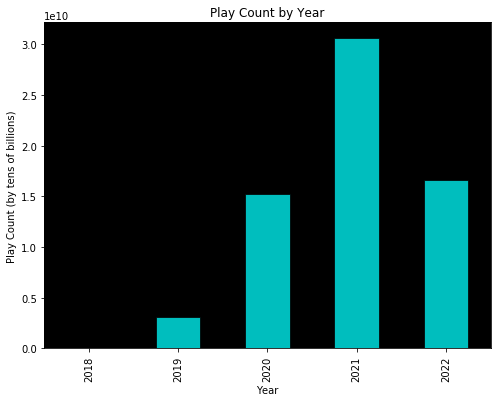

In [7]:
# Generate a bar plot showing play count by year 

fig, ax = plt.subplots(figsize=(8,6))
play_count = years["playCount"].sum()
plot_pandas = play_count.plot.bar(color = ["cyan"], ec="black", alpha=0.75, ax = ax)
ax.set_facecolor('xkcd:black')

plt.xlabel("Year")
plt.ylabel("Play Count (by tens of billions)")
plt.title("Play Count by Year")
plt.show()


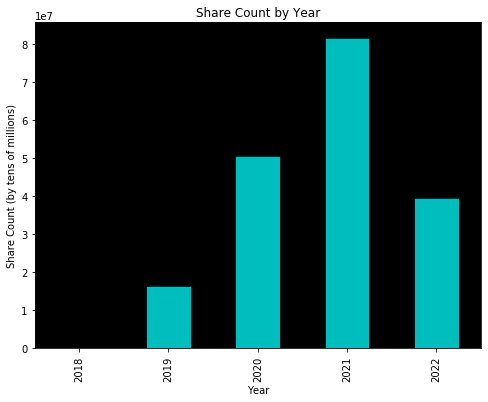

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
play_count = years["shareCount"].sum()
plot_pandas = play_count.plot.bar(color = ["cyan"], ec="black", alpha=0.75, ax = ax)
ax.set_facecolor('xkcd:black')

plt.xlabel("Year")
plt.ylabel("Share Count (by tens of millions)")
plt.title("Share Count by Year")
plt.show()


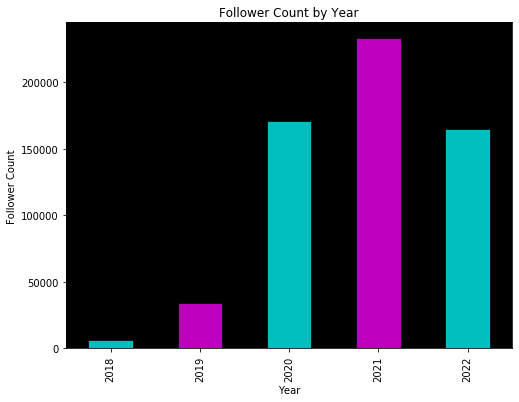

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
play_count = years["authorMeta/following"].sum()
plot_pandas = play_count.plot.bar(color = ["cyan", "magenta"], ec="black", alpha=0.75, ax = ax)
ax.set_facecolor('xkcd:black')

plt.xlabel("Year")
plt.ylabel("Follower Count")
plt.title("Follower Count by Year")
plt.show()


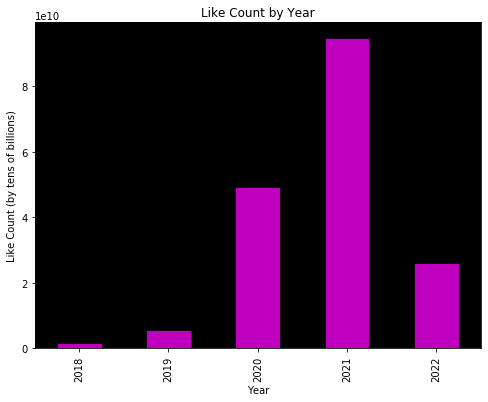

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
play_count = years["authorMeta/heart"].sum()
plot_pandas = play_count.plot.bar(color = ["magenta"], ec="black", alpha=0.75, ax = ax)
ax.set_facecolor('xkcd:black')

plt.xlabel("Year")
plt.ylabel("Like Count (by tens of billions)")
plt.title("Like Count by Year")
plt.show()

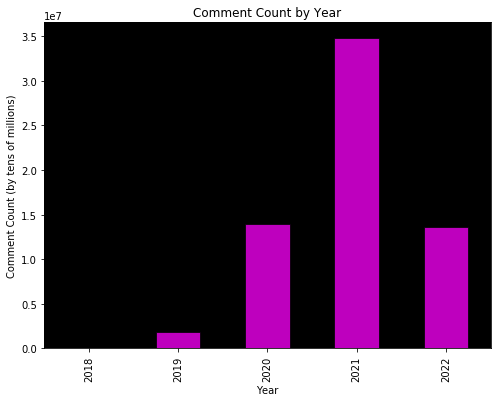

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
play_count = years["commentCount"].sum()
plot_pandas = play_count.plot.bar(color = ["magenta"], ec="black", alpha=0.75, ax = ax)
ax.set_facecolor('xkcd:black')

plt.xlabel("Year")
plt.ylabel("Comment Count (by tens of millions)")
plt.title("Comment Count by Year")
plt.show()